In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_data = 'C:\\Users\\Lakshmi Praffulla\\Desktop\\MLBA_Kaggle\\train.csv'

In [5]:
def getData(path):
#     sequence = []
#     label_str = []
    label = []
    
    with open(train_data) as f:
        sequence = []
        label_str = []
        for line in f:
            text_file = line.split(",");
            if text_file[0] == 'ID':
                continue;
            label_str.append(text_file[1])
            s = text_file[2]
            sequence.append(s[:-1]);
    
    for i in label_str:
        if i == 'DNA':
            label.append(1)
        else:
            label.append(0)
    
    return sequence,label

In [6]:
x_train,y_train = getData(train_data);

In [7]:
len(x_train)

3049

In [8]:
aminoacid_sequence = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

dipeptide_seq = []

for charone in aminoacid_sequence:
    for chartwo in aminoacid_sequence:
        char_to_add = charone+chartwo
        dipeptide_seq.append(char_to_add)

In [9]:
len(dipeptide_seq)

400

In [10]:
def get_dipeptite_dictionary(str):
    
    size = len(str)
    i = 0
    
    eachseq_list = []
    while( i < size - 1 ):
        add_seq = str[i] + str[i+1]
        eachseq_list.append(add_seq)
        i += 1
    
    getdict = {}
    
    for item in eachseq_list:
        if getdict.get(item) == None:
            getdict[item] = 1
        else:
            temp = getdict[item]
            temp += 1
            getdict[item] = temp
    
    new_dict = {}
    for item in getdict:
        value = getdict[item]
        value = value/(len(str)-1)
        new_dict[item] = value
    
    return new_dict

In [11]:
def getlist_of_dictionary(x_train):
    list_dictionary = []
    
    for each in x_train:
        dic = get_dipeptite_dictionary(each)
        list_dictionary.append(dic)
        
    return list_dictionary

In [12]:
def getvector(vector_dictionary):
    final_vector = []
    
    for dic in vector_dictionary:
        vec = [0.0] * 400
        for item in dic:
            for seq in dipeptide_seq:
                if seq == item:
                    index = dipeptide_seq.index(seq)
                    vec[index] = dic[item]
                    
        final_vector.append(vec)            
    
    return final_vector

In [13]:
training_vector_dict = getlist_of_dictionary(x_train)

In [14]:
# training_vector_dict[-1]

In [15]:
X_Train = getvector(training_vector_dict)

In [16]:
len(X_Train)

3049

In [17]:
len(y_train)

3049

In [18]:
x = np.array(X_Train)
y = np.array(y_train)

In [19]:
x.shape

(3049, 400)

In [20]:
y.shape

(3049,)

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state=42)

## Applying Various Models

Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf_rfi = RandomForestClassifier()

In [95]:
clf_rfi.fit(x_train,y_train)

C:\Users\Lakshmi Praffulla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
accuracy_score(y_train,clf_rfi.predict(x_train))

0.9826616682286785

In [97]:
accuracy_score(y_val,clf_rfi.predict(x_val))

0.6579234972677596

In [99]:
ans_rfi = clf_rfi.predict(x_test)

Normalize and Random Forest

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
x_train_n = sc.fit_transform(x_train)
x_val_n = sc.transform(x_val)

In [28]:
clf_rfi_n = RandomForestClassifier()

In [29]:
clf_rfi_n.fit(x_train_n,y_train)

C:\Users\Lakshmi Praffulla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
accuracy_score(y_train,clf_rfi.predict(x_train_n))

0.6246485473289597

In [31]:
accuracy_score(y_val,clf_rfi.predict(x_val_n))

0.5103825136612021

SVM

In [48]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [35]:
svm_model = Pipeline([('clf', SVC())])
param_C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
param_scoring = ["accuracy"]

param = [{'clf__C': param_C,'clf__kernel': ['linear','rbf']}]
grid = GridSearchCV(estimator=svm_model,param_grid=param,refit = 'accuracy',scoring=param_scoring,cv=10,n_jobs=-1)
grid = grid.fit(x_train,y_train)

In [36]:
print(" The Accuracy of the best model is : ",grid.best_score_)
print(" Best Parameters : ",grid.best_params_)

 The Accuracy of the best model is :  0.6180880974695407
 Best Parameters :  {'clf__C': 10.0, 'clf__kernel': 'linear'}


In [37]:
classifier = grid.best_estimator_
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_val)

In [38]:
print("Accuracy on test data using SVM Linear::",classifier.score(x_val, y_val)*100)

Accuracy on test data using SVM Linear:: 59.234972677595636


Getting Test Data

In [22]:
test_data = "C:\\Users\\Lakshmi Praffulla\\Desktop\\MLBA_Kaggle\\valid.csv"

In [23]:
ID = []
test_sequence = []

with open(test_data) as f:
    for line in f:
        after_split = line.split(",")
        if after_split[0] == 'ID':
            continue;
        ID.append(after_split[0])
        test_sequence.append(after_split[1][:-1])

In [24]:
len(ID)

1071

In [25]:
len(test_sequence)

1071

In [26]:
testing_vector_dict = getlist_of_dictionary(test_sequence)

In [27]:
x_test = getvector(testing_vector_dict)

Writing onto the file

In [223]:
import csv

In [224]:
f = open('svm_grid_59val.csv','w')

In [225]:
s = "ID,Lable \n"

In [226]:
c = 0
for i in ans:
    
    if i == 1:
        s = s+ID[c]+","+str(i)+"\n"
    else:
        s = s+ID[c]+","+str(-1)+"\n"
    c = c + 1

In [227]:
f.write(s)

8502

In [228]:
f.close()

DT

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
param = {"criterion":["gini"] , "max_depth":[1,2,3,4,5,6,7,8,9,10] }
clf_dt = DecisionTreeClassifier(random_state=45)
param_scoring = ["accuracy"]

grid_dt = GridSearchCV(clf_dt,param,scoring=param_scoring,refit='accuracy',cv=10,n_jobs=-1)
grid_dt.fit(x_train,y_train) 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=45,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_di

In [233]:
print(" The Accuracy of the best model is : ",grid_dt.best_score_)
print(" Best Parameters : ",grid_dt.best_params_)

 The Accuracy of the best model is :  0.6377694470477976
 Best Parameters :  {'criterion': 'gini', 'max_depth': 2}


In [234]:
classifier_dt = grid_dt.best_estimator_  
classifier_dt.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=45, splitter='best')

In [236]:
dt_ans = classifier_dt.predict(x_test)

KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
classifier_KNN = KNeighborsClassifier(n_neighbors = 10)

In [55]:
classifier_KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [56]:
y_pred_knn = classifier_KNN.predict(x_val)

In [57]:
accuracy_score(y_val,y_pred_knn)

0.6579234972677596

In [58]:
ans_knn = classifier_KNN.predict(x_test)

KNN Grid Search

In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [5]:
import numpy as np
params_KNN = {'n_neighbors': [1,2,3,4], 
              'p': [1]}


In [6]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=100,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [1]:
gs_KNN.fit(x_train, y_train);

In [82]:
gs_KNN.best_params_

{'n_neighbors': 4, 'p': 1}

In [83]:
gs_KNN.best_score_

0.661824429865667

In [84]:
ans_KNN = gs_KNN.predict(x_test)

In [85]:
accuracy_score(y_val,gs_KNN.predict(x_val))

0.6568306010928961

Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=100, 
                     scoring='accuracy')

In [2]:
gs_NB.fit(x_train, y_train);

In [62]:
gs_NB.best_params_

{'var_smoothing': 0.3511191734215131}

In [64]:
gs_NB.best_score_

0.6847860043736332

In [65]:
accuracy_score(y_val,gs_NB.predict(x_val))

0.6808743169398908

In [66]:
ans_NB= gs_NB.predict(x_test)

In [73]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

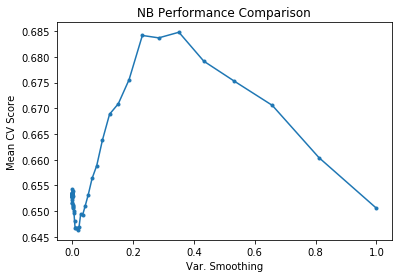

In [74]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

Ensemble Methods

In [115]:
ans_NB

array([0, 1, 1, ..., 0, 1, 0])

In [116]:
ans_KNN

array([1, 0, 0, ..., 0, 0, 0])

In [117]:
ans_rfi

array([1, 0, 0, ..., 0, 0, 0])

In [118]:
ensemble_knn_rf_nb = []

In [119]:
for i in range(len(ans_NB)):
    
    if ( ans_NB[i] + ans_KNN[i] + ans_rfi[i] ) >= 2:
        ensemble_knn_rf_nb.append(1)
    else:
        ensemble_knn_rf_nb.append(0)

In [120]:
# ensemble_knn_rf_nb

In [121]:
f = open('ensemble_knn_rf_nb.csv','w')

In [122]:
s = "ID,Lable\n"

In [123]:
c = 0
for i in ensemble_knn_rf_nb:
    
    if i == 1:
        s = s+ID[c]+","+str(i)+"\n"
    else:
        s = s+ID[c]+","+str(-1)+"\n"
    c = c + 1

In [124]:
f.write(s)

8316

In [125]:
f.close()